<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_Linear_Equation_Problem_linearRegression_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use('dark_background')

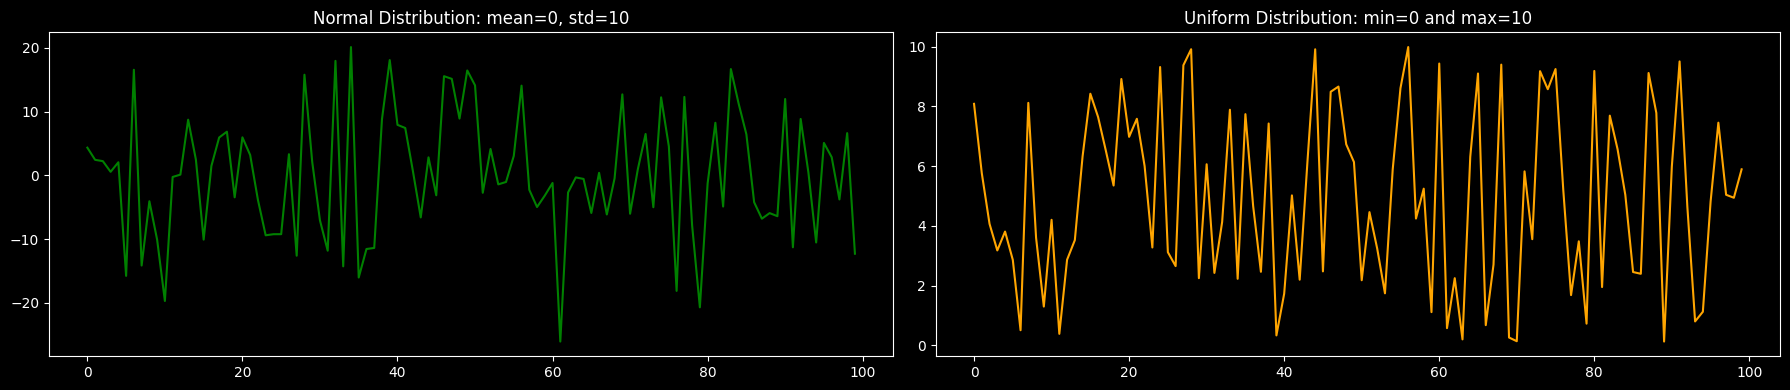

In [32]:
#line plot of normal and uniform distribution
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('Normal Distribution: mean=0, std=10')
sns.lineplot(np.random.normal(0, 10, 100), color='green')
plt.subplot(1,2,2)
plt.title('Uniform Distribution: min=0 and max=10')
sns.lineplot(np.random.uniform(0,10,100), color='orange')
plt.tight_layout()
plt.show()

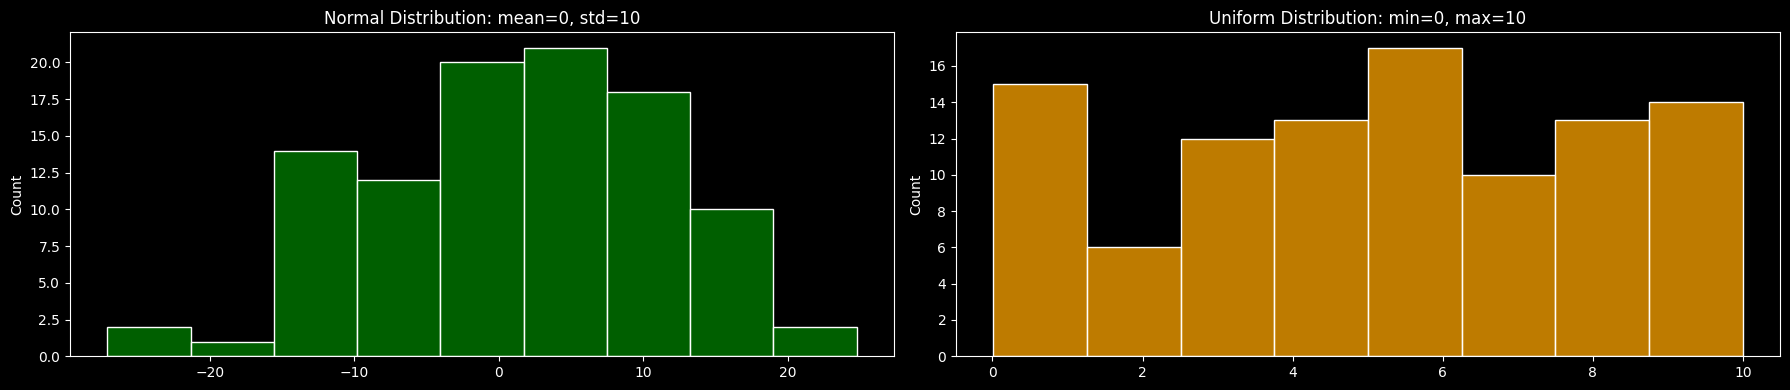

In [33]:
#histogram plot
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('Normal Distribution: mean=0, std=10')
sns.histplot(np.random.normal(0, 10, 100), color='green')
plt.subplot(1,2,2)
plt.title('Uniform Distribution: min=0, max=10')
sns.histplot(np.random.uniform(0,10,100), color='orange')
plt.tight_layout()
plt.show()

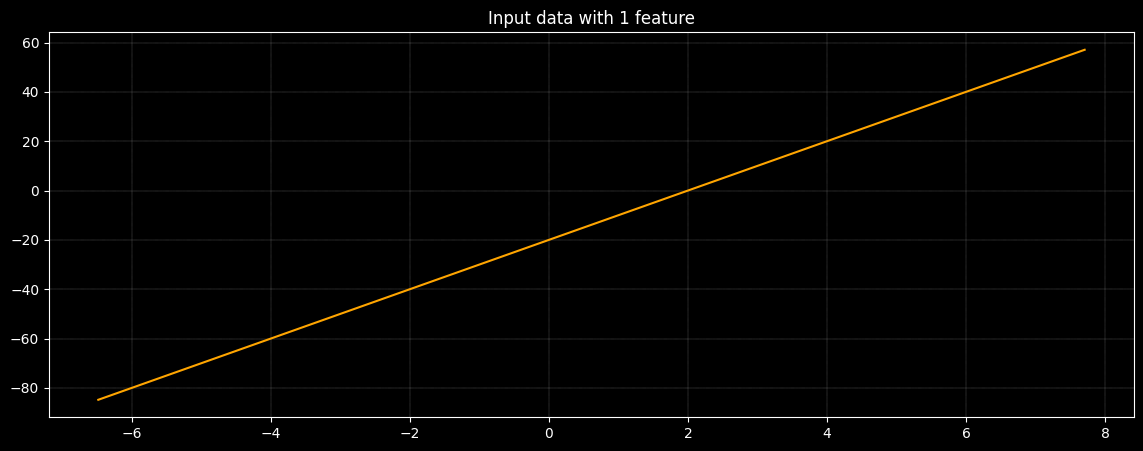

In [64]:
#Lets try a simialar exercise without the noise addition to the input value. Lets use a simple equation: y = 10x-20, use normal distribution
np.random.seed(42)
X = np.random.normal(0,2, 1000)
y = np.multiply(10,X) - 20
plt.figure(figsize=(14,5))
sns.lineplot(x=X,y=y, color='orange')
# plt.ylim(y.min(), y.max())
# plt.xlim(X.min(), X.max())
plt.grid(linewidth=0.15, linestyle='--')
plt.title('Input data with 1 feature')
plt.show()

In [66]:
# now lets split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]

(750, 250, 750, 250)

In [70]:
#now lets model using linear regression, and use a 1 input dimenstion with 1 neuron and 1 output, no activations funtions

#instantiate the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

#lets compile the model: meaning check for error, optimize the error and get accuracy report
model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= tf.keras.metrics.mse
    )

#now lets run/fit the model with the training data and save it
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [102]:
df = pd.DataFrame(history.history)
df['epochs'] = history.epoch
df.reset_index(drop=True, inplace=True)
df.set_index(pd.Index(history.epoch))
df.tail(5)

,loss,mean_squared_error,epochs
95,0.003802,0.000030,95
96,0.003778,0.000028,96
97,0.002801,0.000016,97
98,0.001662,0.000005,98
99,0.001495,0.000005,99


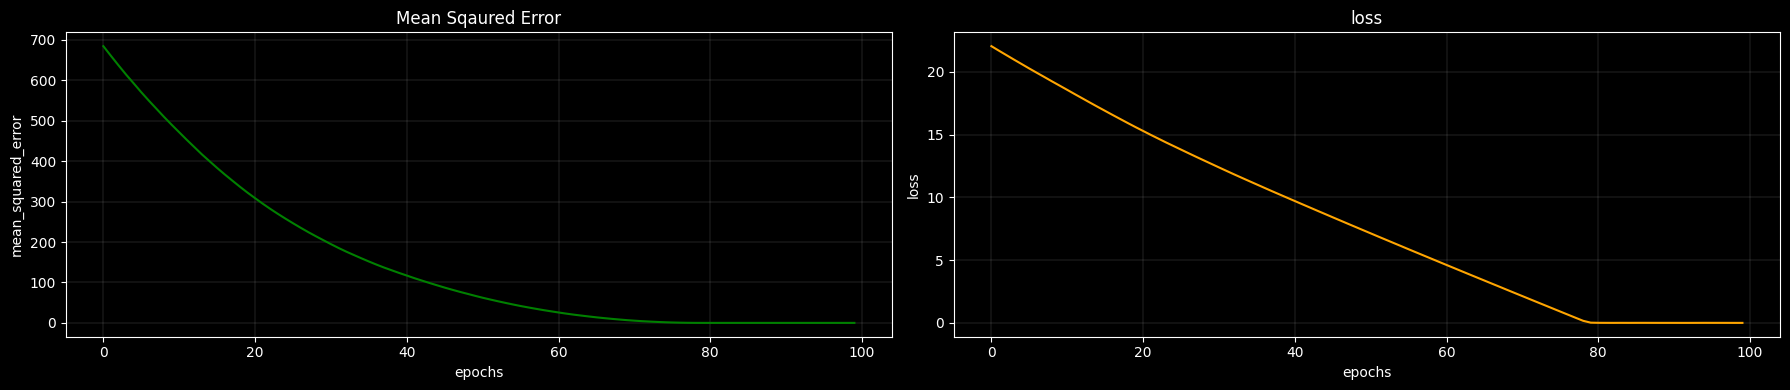

In [110]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.grid(linewidth=0.1)
plt.title('Mean Sqaured Error')
sns.lineplot(x=df['epochs'], y=df['mean_squared_error'], color='green')
plt.subplot(1,2,2)
plt.grid(linewidth=0.1)
plt.title('loss')
sns.lineplot(x=df['epochs'], y=df['loss'], color='orange')

plt.tight_layout()
plt.show()

In [161]:
#Lets predict and evaluate
y_pred = model.predict(X_test, verbose=0)

model.evaluate(y_pred, y_test) # the reason the loss and mse are very high is because of overfitting. The model got nothing to learn, it completly nailed the training data.

8/8 [==============================] - 0s 2ms/step - loss: 228.2630 - mean_squared_error: 74988.4531


[228.2629852294922, 74988.453125]

In [141]:
#get the bias(intercept) and slope(weight) for the equation y = 10x-20
print('The weight based on the prediction is= ',model.layers[0].get_weights()[0][0][0])
print('The bias based on the prediction  is= ',model.layers[0].get_weights()[1][0])

The weight based on the prediction is=  10.000552
The bias based on the prediction  is=  -19.99937


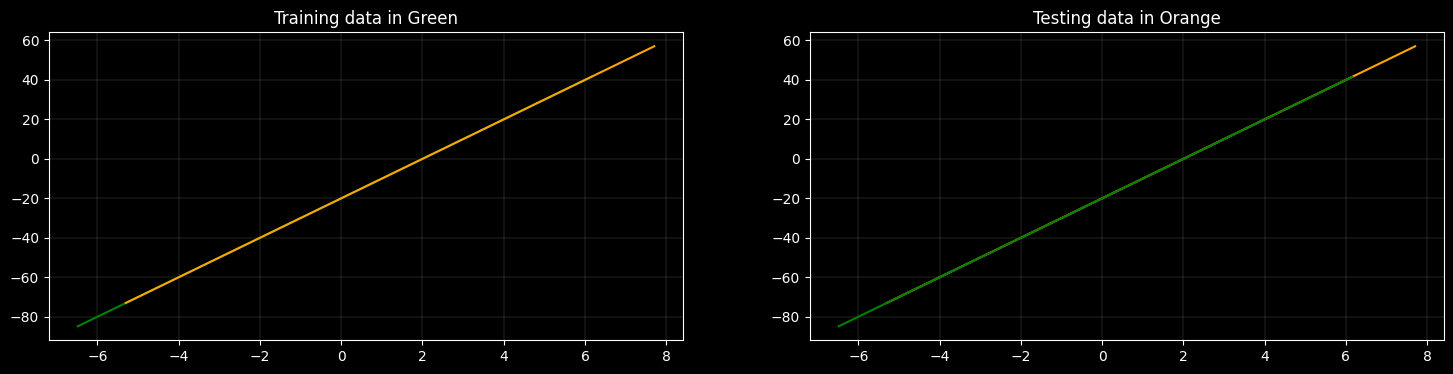

In [160]:
#showing the training and testing data: training supposed to be more
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.title('Training data in Green')
sns.lineplot(x=X_train, y=y_train, color='green')
sns.lineplot(x=X_test, y=y_pred.reshape(-1,), color='orange')
plt.grid(linewidth=0.1)

plt.subplot(1,2,2)
plt.title('Testing data in Orange')
sns.lineplot(x=X_test, y=y_pred.reshape(-1,), color='orange')
sns.lineplot(x=X_train, y=y_train, color='green')
plt.grid(linewidth=0.1)
plt.show()